Kaggle competitions are different from OpenAI.

In [230]:
import gym
import itertools as it
import numpy as np
import uuid
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The value of picking an action $a$ from a state $S_t$ is defined via; 

$$ Q(S_t, a) = R_{t}(S_t, a) + \gamma Q(S_{t+1}, a^*)$$

This formula is a bit curious. It tells us that the reward of going of picking an action from a certain state can be split up into two different pieces: a short term reward and value of being in a new state $S_{t+1}$. The value of $S_{t+1}$ is dependant on the optimal action from that state. 

How would you be able to use a deep neural network for this? 

### Architecture 

In [231]:
%autoreload
import StateFitter as sf

env = gym.make('CartPole-v0')
vmod = sf.ValueModel(env)
agent = sf.Agent(env, vmod)
game = sf.Game(env, agent, que_len = 1000, gamma=0.975, max_game_len=100)

[2016-09-30 17:30:22,970] Making new env: CartPole-v0


In [232]:
game_lens = []
nn_hist = []
for i in range(100):
    len_before = len(game.state_que)
    t = game.run_episode()
    nn_hist = nn_hist + vmod.fit(game.state_que).losses
    game_lens.append(t)

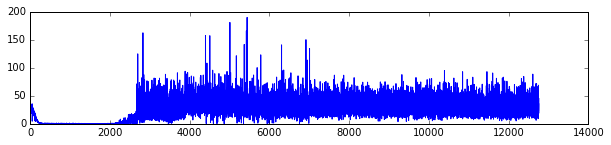

In [233]:
plt.figure(figsize=(10,2))
plt.plot(nn_hist)

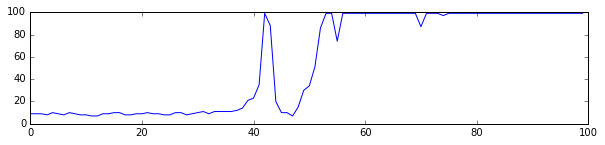

In [234]:
plt.figure(figsize=(10,2))
plt.plot(game_lens)

In [235]:
state_in = np.matrix([list(_.old_obs) for _ in game.state_que])
value_out = [_.value for _ in game.state_que]
actions_taken = [_.action for _ in game.state_que]
pred = [vmod.predict(_) for _ in state_in]
pred = [_[0][_[1]] for _ in zip(pred, actions_taken)]

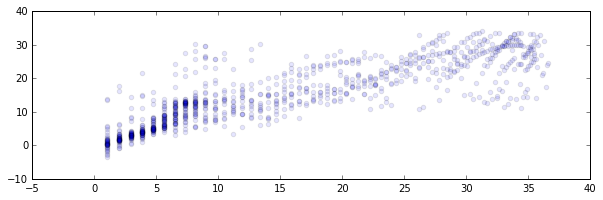

In [238]:
plt.figure(figsize=(10,3))
plt.scatter(value_out, pred, alpha = 0.1)

So it seems to work. 